<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Percentage of Selling_Price outliers >= 3 std from the mean: 2.6578073089700998%


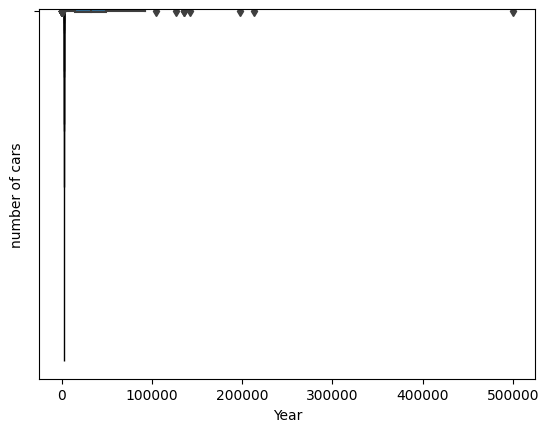

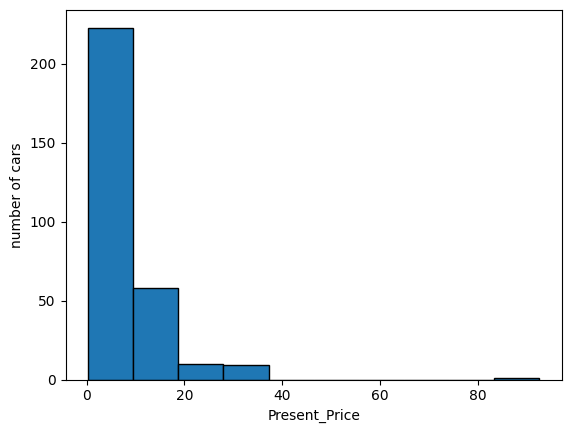

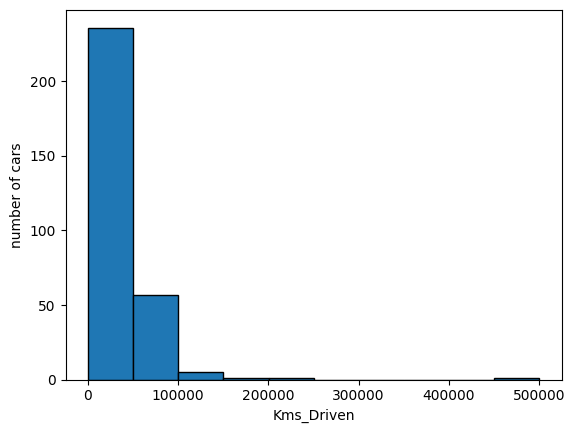

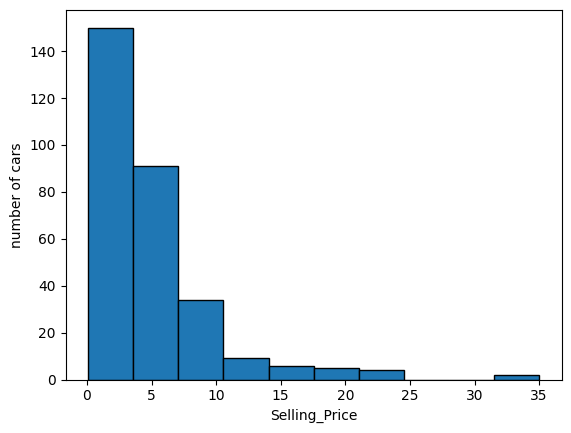

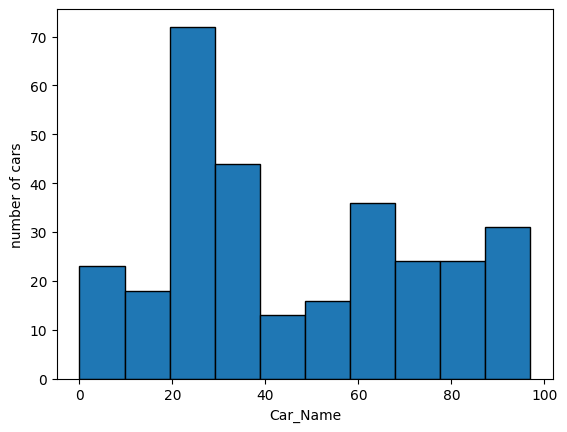

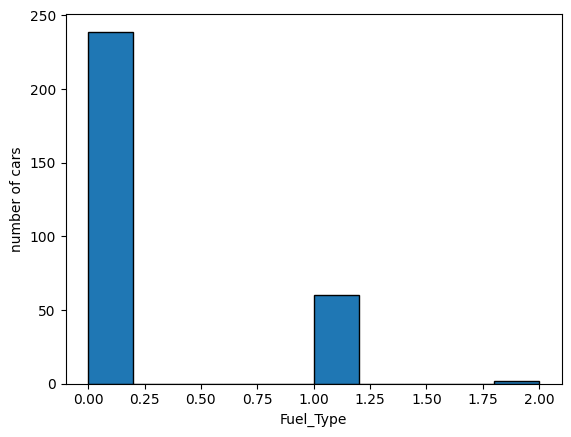

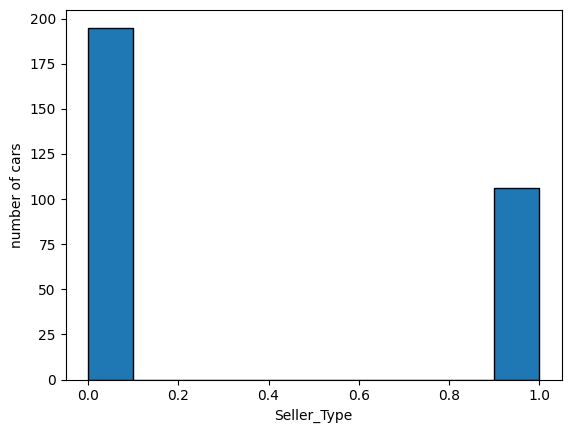

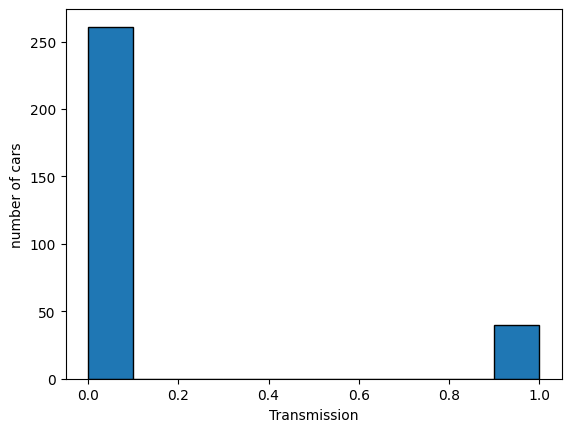

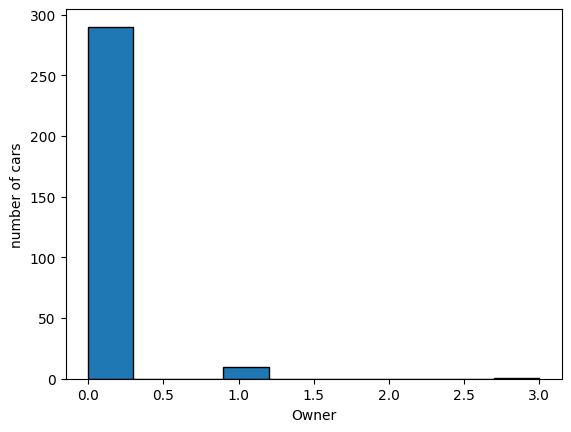

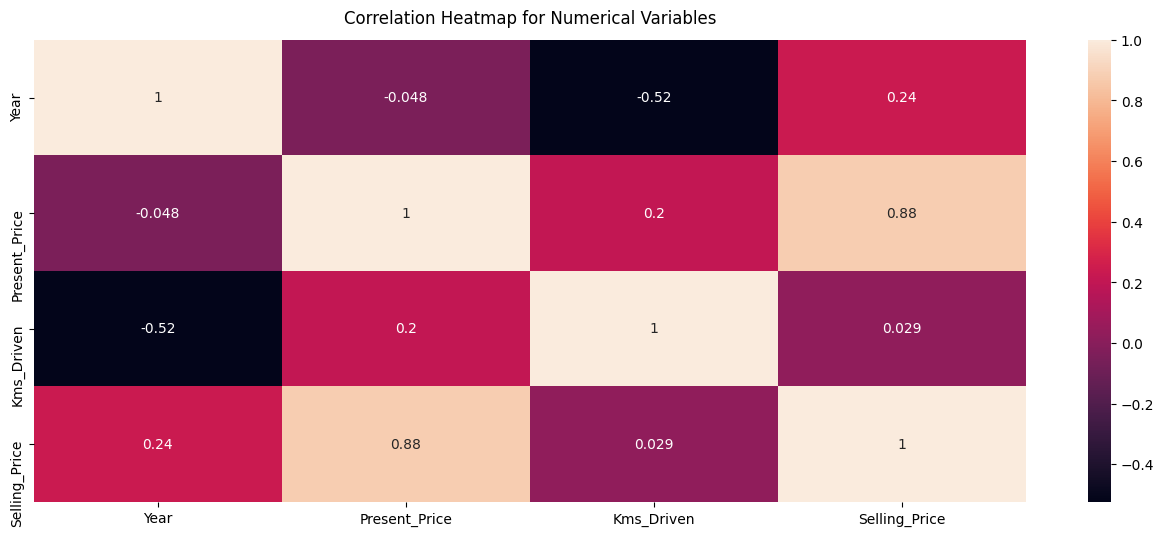

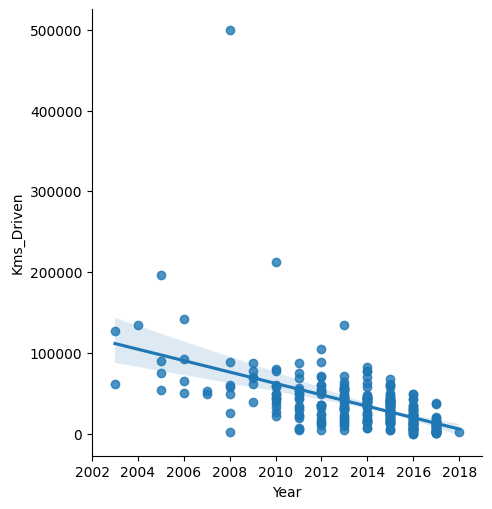

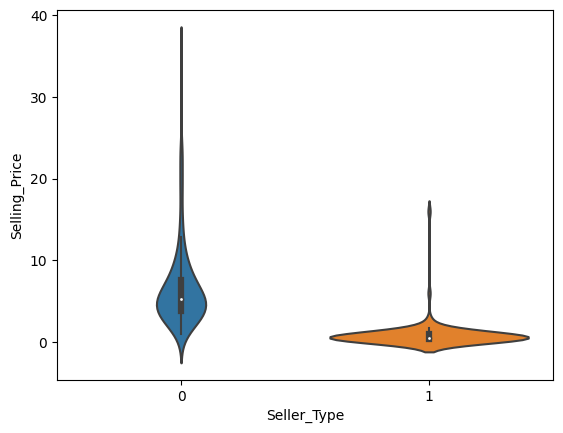

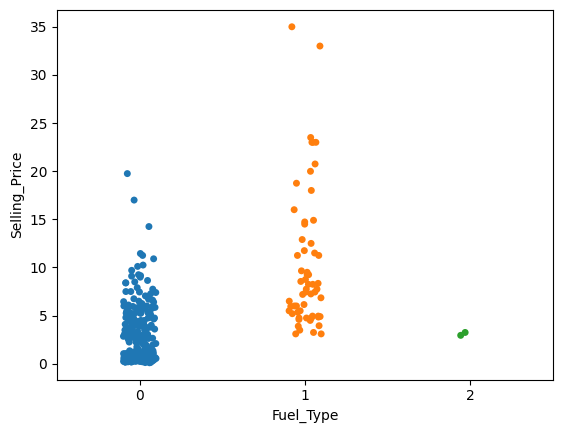

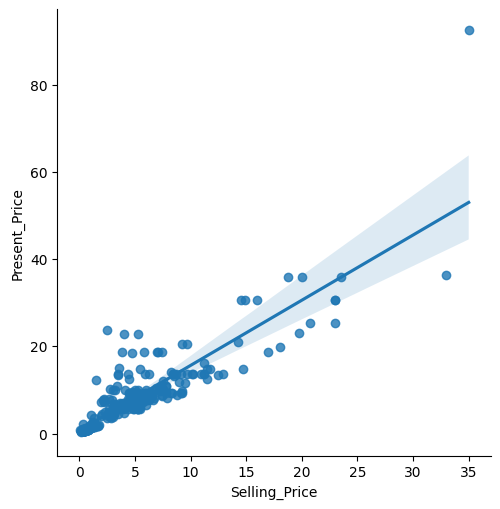

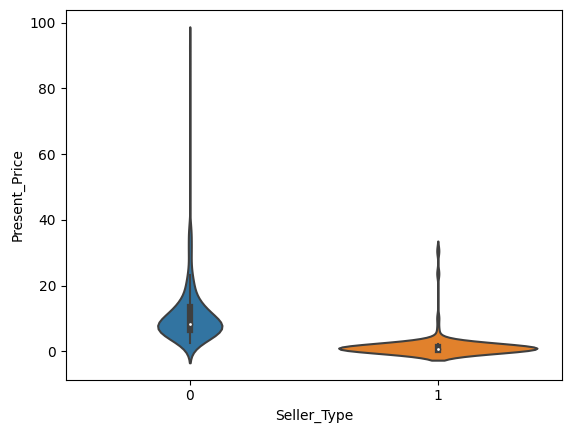

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\malex\\Documents\\vehicle-sales\\data\\preprocessed\\\\X.csv'

In [2]:
######import libraries and data

#import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

#import data
car_data = pd.read_csv('data/car data.csv')

######EDA

#look at formatting of entries
car_data.head()

#look at null count and dtype
car_data.info()

#numerical features
numerical = [
    'Year',
    'Present_Price',
    'Kms_Driven',
    'Selling_Price'
]

#categorical features
categorical = [
    'Car_Name',
    'Fuel_Type',
    'Seller_Type',
    'Transmission',
    'Owner'
]

#look at distribution of data
car_data.describe()


#look at outliers in selling price as a percentage
percentage=(len(car_data.Selling_Price[np.abs(stats.zscore(car_data.Selling_Price)) >= 3])/len(car_data))*100
print('Percentage of Selling_Price outliers >= 3 std from the mean: {}%'.format(percentage))

#look at number of outliers greater than or equal to 3 std from mean
car_data[numerical][np.abs(stats.zscore(car_data[numerical])) >= 3]

#look at number of outliers greater than or equal to 4 std from mean
car_data[numerical][np.abs(stats.zscore(car_data[numerical])) >= 4]

#look at number of outliers greater than or equal to 5 std from mean
car_data[numerical][np.abs(stats.zscore(car_data[numerical])) >= 5]

#look at number of outliers greater than or equal to 6 std from mean
car_data[numerical][np.abs(stats.zscore(car_data[numerical])) >= 6]

#selling price outliers visualized
sns.boxplot(x=car_data['Selling_Price'])
plt.xlabel('Selling_Price')

#present price outlier visualized
sns.boxplot(x=car_data['Present_Price'])
plt.xlabel('Present_Price')

#kms driven outlier visualized
sns.boxplot(x=car_data['Kms_Driven'])
plt.xlabel('Kms_Driven')

##data cleaning

#capitalize all car names
for name in car_data['Car_Name']:
    car_data = car_data.replace(name,name.title())
    
#look for anything that needs to be fixed
values,counts=np.unique(car_data['Car_Name'],return_counts=True)
unique_cars_counts = pd.DataFrame({'car names':values, 'counts':counts})
values

#reassign categorical names to numbers
car_data = car_data.replace('Petrol',0)
car_data = car_data.replace('Diesel',1)
car_data = car_data.replace('CNG',2)

car_data = car_data.replace('Dealer',0)
car_data = car_data.replace('Individual',1)

car_data = car_data.replace('Manual',0)
car_data = car_data.replace('Automatic',1)

#replace car names with numbers
for i in unique_cars_counts['car names']:
    idx = pd.Index(unique_cars_counts['car names'])
    car_data = car_data.replace(i,idx.get_loc(i))
    
#assign categorical variables to int dtype
car_data[categorical].astype('int64')

##data distribution


#look at numerical data distribution
for i in car_data[numerical].columns:
    plt.hist(car_data[numerical][i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of cars')
    plt.show()
    
#look at categorical data distribution
for i in car_data[categorical].columns:
    plt.hist(car_data[categorical][i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of cars')
    plt.show()
    
##finding correlations with heat map and visualizations

#heat map to find extreme positive and negative correlations in numerical data
plt.figure(figsize=(16, 6))
sns.heatmap(car_data[numerical].corr(), annot=True)
plt.title('Correlation Heatmap for Numerical Variables', fontdict={'fontsize':12}, pad=12);

#lmplot comparing year and kms driven (-0.52 corr)
sns.lmplot(x='Year', y='Kms_Driven',data=car_data)

#settings to display all markers
xticks, xticklabels = plt.xticks()
xmin = 2002
xmax = 2019
plt.xlim(xmin, xmax)
plt.xticks(xticks)

plt.show()

#violin plot comparing selling price and seller type
sns.violinplot(y='Selling_Price',
              x='Seller_Type', data = car_data)
plt.show()

#stripplot comparing selling price and fuel type
sns.stripplot(y=car_data['Selling_Price'],
              x=car_data['Fuel_Type'])
plt.show()

#lmplot comparing selling price and present price (0.88 corr)
sns.lmplot(x='Selling_Price', y='Present_Price',data=car_data)

#settings to display all markers
xmin = -2
xmax = 37
plt.xlim(xmin, xmax)

plt.show()

#vionlinplot comparing present price and seller type
sns.violinplot(y='Present_Price',
              x='Seller_Type', data = car_data)
plt.show()

##applyng linear model to better understand feature realtionship with selling price

#change dtype of categorical features to object
car_data[categorical]=car_data[categorical].astype('object')

#copy of variables and target
X = car_data.copy().drop('Selling_Price', axis=1)
y = car_data.pop('Selling_Price')

#remove Selling_Price from numerical variables
numerical.remove('Selling_Price')

X.info()

#create dummy variables for categorical variables
car_data_dum = pd.get_dummies(X, drop_first=True)

#generate OLS Regression Results
import statsmodels.api as sm

X_sm = sm.add_constant(car_data_dum)
model = sm.OLS(y,X_sm)
model.fit().summary()

########preparing data for ML

#import ML preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

#one hot encoder for categorical variables
encoder=OneHotEncoder(handle_unknown='error', drop='first')
X = pd.concat([X[numerical],pd.get_dummies(X[categorical], drop_first=True)],axis=1)
feature_names = X.columns

# train/test split with stratify making sure classes are evenlly represented across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

#define scaler
scaler=MinMaxScaler()

#apply scaler to numerical data
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

#####pickle
import pickle

outfile = open('scaler.pkl', 'wb')
pickle.dump(scaler,outfile)
outfile.close()


####save data to csv

import os

path = r'C:\Users\malex\Documents\vehicle-sales\data\preprocessed\\'

export_X = X.to_csv(os.path.join(path,r'X.csv'),index=False)
export_y = y.to_csv(os.path.join(path,r'y.csv'),index=False)

export_X_train = X_train.to_csv(os.path.join(path,r'X_train.csv'),index=False)
export_X_test = X_test.to_csv(os.path.join(path,r'X_test.csv'),index=False)
export_y_train = y_train.to_csv(os.path.join(path,r'y_train.csv'),index=False)
export_y_test = y_test.to_csv(os.path.join(path,r'y_test.csv'),index=False)